In [1]:
import numpy as np
import skimage
import skimage.io
import skimage.feature
import skimage.transform as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from sklearn.svm import SVC

In [2]:
W = 24
H = 32

In [3]:
def prepare_image(img):
    return skimage.color.rgb2gray(img)

In [4]:
def get_hog(img):
    return skimage.feature.hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1))

In [5]:
import glob
file_faces = glob.glob("./train/faces/*.png")
file_non_faces = glob.glob("./train/non-faces/*.png")
file_tests = glob.glob("./test/*.jpg")

In [6]:
face_imgs = [prepare_image(skimage.io.imread(file_name)) for file_name in file_faces]
non_face_imgs = [prepare_image(skimage.io.imread(file_name)) for file_name in file_non_faces]
test_imgs = [skimage.io.imread(file_name) for file_name in file_tests]

In [7]:
print (len(face_imgs))
print (len(non_face_imgs))

644
2572


In [8]:
img_hogs = [get_hog(img) for img in face_imgs + non_face_imgs]

In [9]:
img_y = len(face_imgs) * [1] + len(non_face_imgs) * [0]

In [10]:
clf = SVC(probability=True)

In [11]:
clf.fit(img_hogs, img_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
clf.predict_proba(img_hogs[0].reshape(1, -1))

array([[  1.10778578e-05,   9.99988922e-01]])

In [13]:
clf.predict_proba(img_hogs[1003].reshape(1, -1))

array([[ 0.55560354,  0.44439646]])

In [14]:
def find_face_on_prepared_image(img, clf, w, h):
    best_proba = 0.0
    best_x = 0
    best_y = 0
    delta = (img.shape[1] - w) // 50
    for x in range(0, img.shape[0] - h):
        y = 0
        while y < img.shape[1] - w:
            hog = get_hog(img[x:x+h, y:y+w]).reshape(1, -1)
            current_proba = clf.predict_proba(hog)[0][1]
            if best_proba < current_proba:
                best_proba = current_proba
                best_x = x
                best_y = y
            y += 1
            if current_proba < 0.4:
                y += delta
    return best_proba, best_x, best_y
    

In [17]:
def find_face(img):
    best_proba = -1
    best_x = -1
    best_y = -1
    best_w = W
    best_h = H
    for left_side in np.linspace(50, min(220, img.shape[0]), num=20):
        factor = (left_side + 0.0) / img.shape[0]
        shape = (int(factor * img.shape[0] + 0.5), int(factor * img.shape[1] + 0.5))
        
        proba, x, y = find_face_on_prepared_image(
            prepare_image(tf.resize(img, shape)), clf, W, H)
        x = int(x / factor)
        y = int(y / factor)

        if proba > best_proba:
            best_proba, best_x, best_y = proba, x, y
            best_w = int (W / factor + 0.5)
            best_h = int (H / factor + 0.5)
    
    print ('best_proba = ' + str(best_proba))
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(img)
    # Create a Rectangle patch
    rect = patches.Rectangle((best_y, best_x), best_w, best_h, linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()
    return best_x, best_y, best_w, best_h

best_proba = 0.98377331434


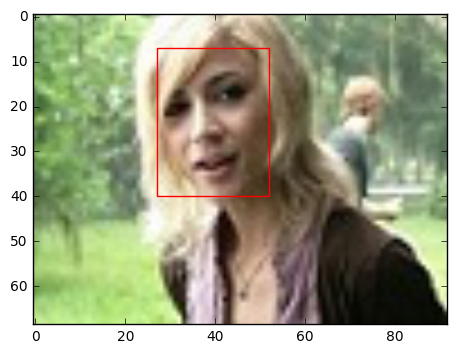

best_proba = 0.99999466384


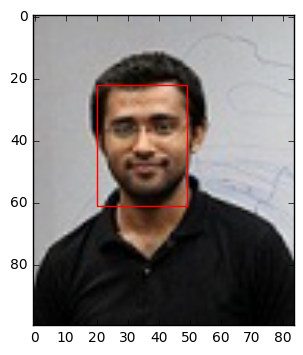

best_proba = 0.999992329861


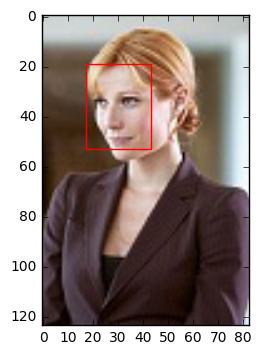

best_proba = 0.999999256287


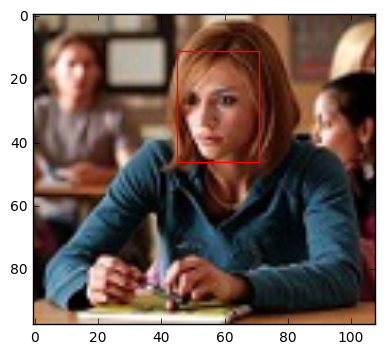

best_proba = 0.99550355905


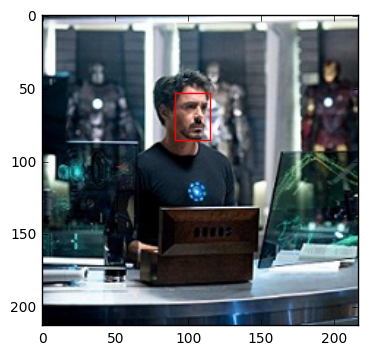

best_proba = 0.999989801857


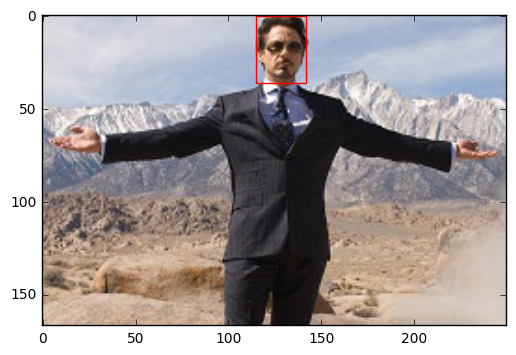

best_proba = 0.999999921766


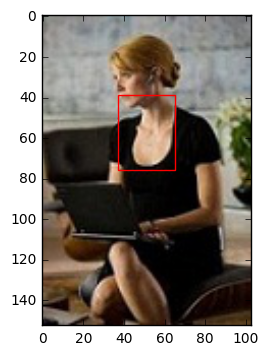

best_proba = 0.987618949369


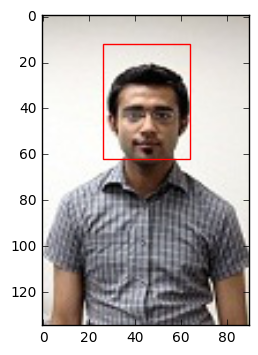

best_proba = 0.9965826615


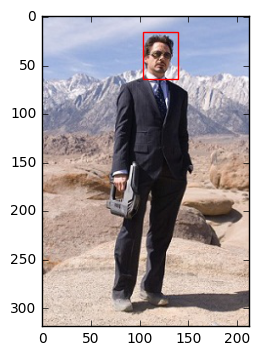

In [18]:
for test_img in test_imgs:
    find_face(test_img)

Результат на предпоследней картинке неудовлетворительный, в других местах все ок.